Imports

In [2]:
%load_ext autoreload
%autoreload 2
%aimport -numpy
%aimport -torch
%aimport -gym

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
torch.manual_seed(0)

# for saving/loading
import os

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Our functions

In [3]:
from Train_policy_func import Policy, Policy_v2, device
from Generate_traj_func import generate_trajectory
from Plot_Functions import plot_suboptimality, plot_trajectory_performance, plot_Scores
from PPO import ppo_update, RolloutBuffer, evaluate_policy

# Training loop for OPPO
from OPPO import baseline_CartPole_V0, baseline_MountainCar, OPPO_update
from OPPO import baseline_1, baseline_CartPole_v0_Fla
from PPO_Fla import *
from pairs_generator import sample_preference_pairs
from DPO import DPO_training



c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


beta by default 0.5


Creating policies and changing seeds:

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\youss\AppData\Local\Temp\ipykernel_15996\4042562656.py:42: FutureWarning: You are using `torch.

Evaluations over 100 episodes done for both policies


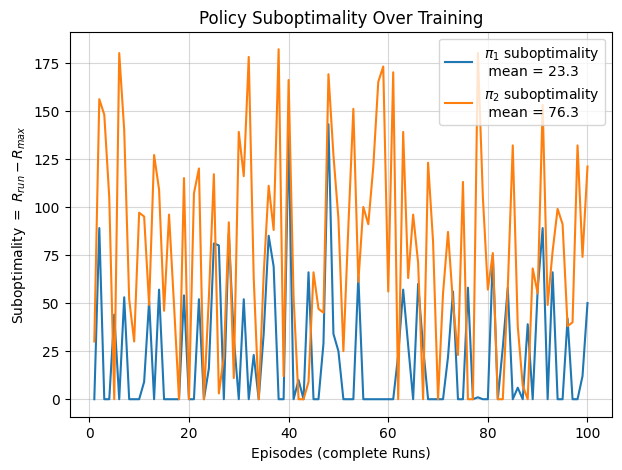

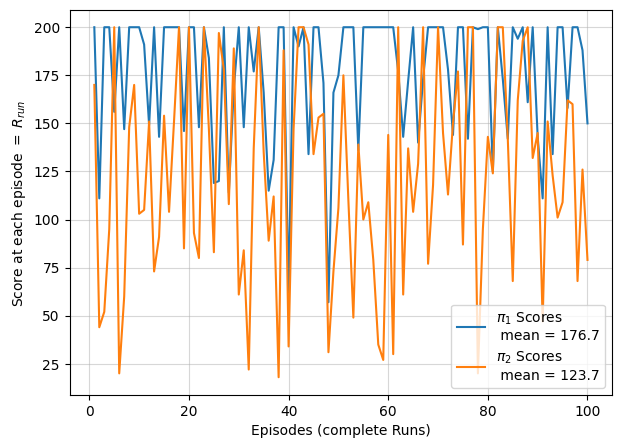

π₁ → length 176, total reward 176.0
π₂ → length 200, total reward 200.0
Collected 200 preference pairs.


C:\Users\youss\AppData\Local\Temp\ipykernel_15996\4042562656.py:97: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}

Epoch 0: DPO Loss = 0.7034
Epoch 10: DPO Loss = 0.6922
Epoch 20: DPO Loss = 0.6848
Epoch 30: DPO Loss = 0.6777
Epoch 40: DPO Loss = 0.6712
Epoch 50: DPO Loss = 0.6643
Epoch 60: DPO Loss = 0.6568
Epoch 70: DPO Loss = 0.6488
Epoch 80: DPO Loss = 0.6411
Epoch 90: DPO Loss = 0.6347
Epoch 100: DPO Loss = 0.6300
Epoch 110: DPO Loss = 0.6266
Epoch 120: DPO Loss = 0.6241
Epoch 130: DPO Loss = 0.6222
Epoch 140: DPO Loss = 0.6208
Epoch 150: DPO Loss = 0.6196
Epoch 160: DPO Loss = 0.6184
Epoch 170: DPO Loss = 0.6173
Epoch 180: DPO Loss = 0.6163
Epoch 190: DPO Loss = 0.6155
Epoch 200: DPO Loss = 0.6146
Epoch 210: DPO Loss = 0.6139
Epoch 220: DPO Loss = 0.6132
Epoch 230: DPO Loss = 0.6125
Epoch 240: DPO Loss = 0.6119
Epoch 250: DPO Loss = 0.6113
Epoch 260: DPO Loss = 0.6108
Epoch 270: DPO Loss = 0.6102
Epoch 280: DPO Loss = 0.6098
Epoch 290: DPO Loss = 0.6092
Epoch 300: DPO Loss = 0.6088
Epoch 310: DPO Loss = 0.6084
Epoch 320: DPO Loss = 0.6079
Epoch 330: DPO Loss = 0.6074
Epoch 340: DPO Loss = 0.6

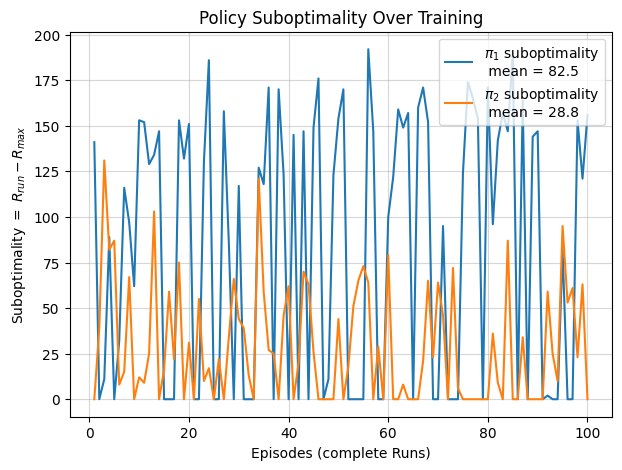

Evaluations over 100 episodes done for both policies


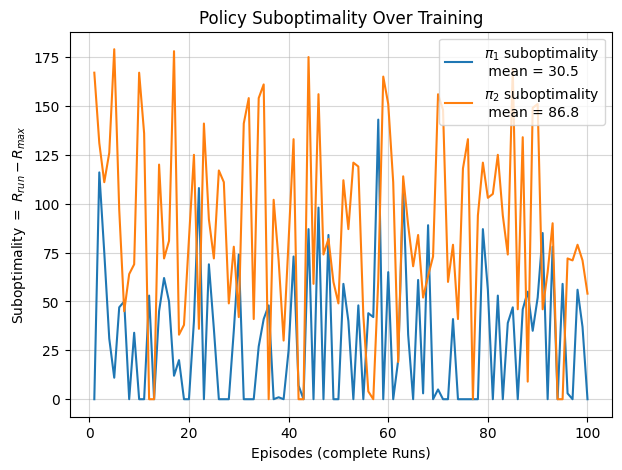

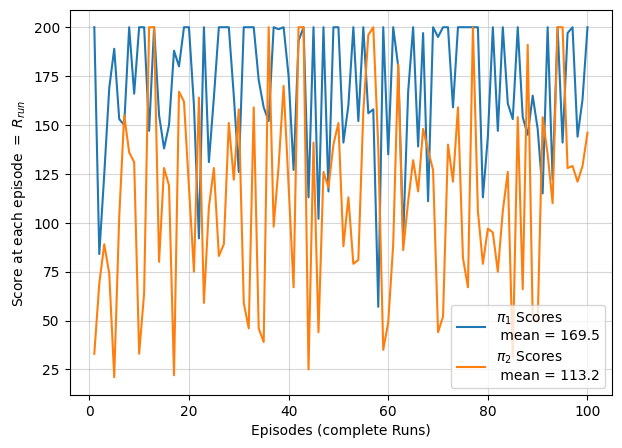

π₁ → length 200, total reward 200.0
π₂ → length 21, total reward 21.0
Collected 200 preference pairs.
Epoch 0: DPO Loss = 0.7039
Epoch 10: DPO Loss = 0.6927
Epoch 20: DPO Loss = 0.6848
Epoch 30: DPO Loss = 0.6773
Epoch 40: DPO Loss = 0.6704
Epoch 50: DPO Loss = 0.6643
Epoch 60: DPO Loss = 0.6585
Epoch 70: DPO Loss = 0.6534
Epoch 80: DPO Loss = 0.6489
Epoch 90: DPO Loss = 0.6452
Epoch 100: DPO Loss = 0.6418
Epoch 110: DPO Loss = 0.6388
Epoch 120: DPO Loss = 0.6358
Epoch 130: DPO Loss = 0.6333
Epoch 140: DPO Loss = 0.6307
Epoch 150: DPO Loss = 0.6285
Epoch 160: DPO Loss = 0.6262
Epoch 170: DPO Loss = 0.6242
Epoch 180: DPO Loss = 0.6222
Epoch 190: DPO Loss = 0.6204
Epoch 200: DPO Loss = 0.6182
Epoch 210: DPO Loss = 0.6163
Epoch 220: DPO Loss = 0.6144
Epoch 230: DPO Loss = 0.6124
Epoch 240: DPO Loss = 0.6107
Epoch 250: DPO Loss = 0.6089
Epoch 260: DPO Loss = 0.6073
Epoch 270: DPO Loss = 0.6056
Epoch 280: DPO Loss = 0.6041
Epoch 290: DPO Loss = 0.6027
Epoch 300: DPO Loss = 0.6011
Epoch 310:

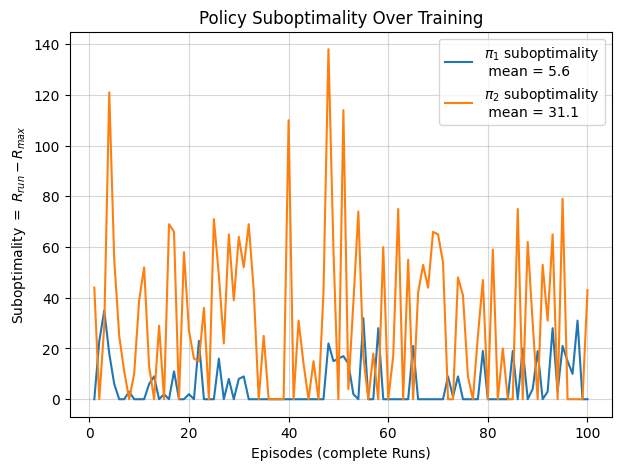

Evaluations over 100 episodes done for both policies


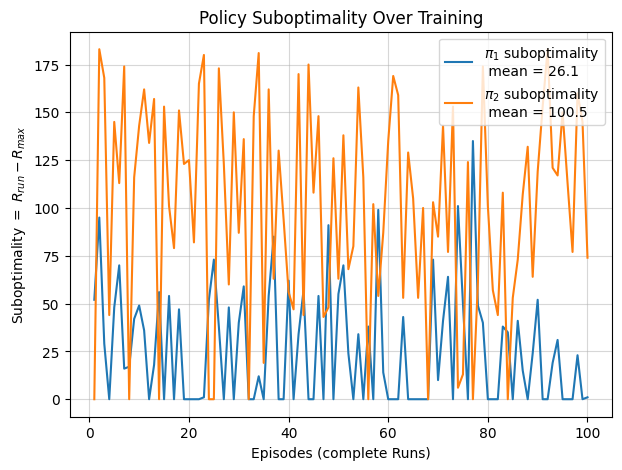

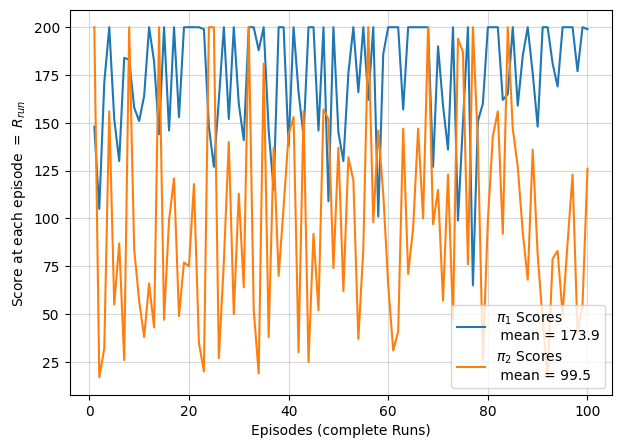

π₁ → length 158, total reward 158.0
π₂ → length 29, total reward 29.0
Collected 200 preference pairs.
Epoch 0: DPO Loss = 0.7047
Epoch 10: DPO Loss = 0.6933
Epoch 20: DPO Loss = 0.6841
Epoch 30: DPO Loss = 0.6734
Epoch 40: DPO Loss = 0.6601
Epoch 50: DPO Loss = 0.6442
Epoch 60: DPO Loss = 0.6268
Epoch 70: DPO Loss = 0.6113
Epoch 80: DPO Loss = 0.5999
Epoch 90: DPO Loss = 0.5920
Epoch 100: DPO Loss = 0.5862
Epoch 110: DPO Loss = 0.5818
Epoch 120: DPO Loss = 0.5784
Epoch 130: DPO Loss = 0.5758
Epoch 140: DPO Loss = 0.5737
Epoch 150: DPO Loss = 0.5718
Epoch 160: DPO Loss = 0.5702
Epoch 170: DPO Loss = 0.5686
Epoch 180: DPO Loss = 0.5672
Epoch 190: DPO Loss = 0.5660
Epoch 200: DPO Loss = 0.5650
Epoch 210: DPO Loss = 0.5641
Epoch 220: DPO Loss = 0.5633
Epoch 230: DPO Loss = 0.5625
Epoch 240: DPO Loss = 0.5617
Epoch 250: DPO Loss = 0.5611
Epoch 260: DPO Loss = 0.5606
Epoch 270: DPO Loss = 0.5601
Epoch 280: DPO Loss = 0.5595
Epoch 290: DPO Loss = 0.5588
Epoch 300: DPO Loss = 0.5580
Epoch 310:

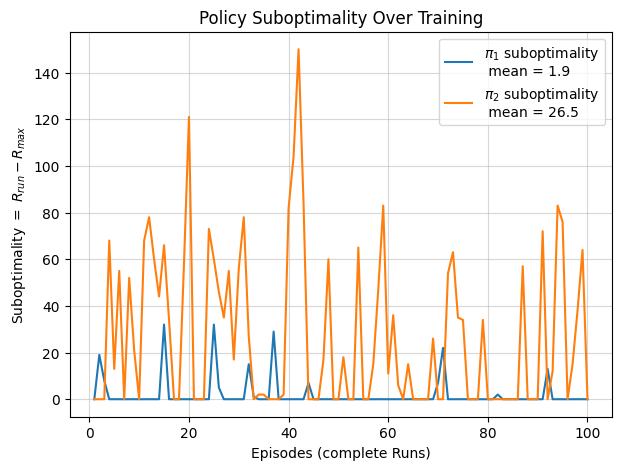

In [6]:
seeds_list=[42,100,35]
for seed in seeds_list:
    # Choose environment:

    # env 1: CartPole-v0
    env_name='CartPole-v0'
    baseline = baseline_CartPole_v0_Fla
    target_score = 185 # for CartPole-v0
    torch.manual_seed(seed)
    # env 2: Continuous-MountainCar-v0
    # env_name='MountainCar-v0'
    # baseline = baseline_MountainCar
    # target_score = -110 # for Continuous-MountainCar-v0

    lr_oppo = 0.003 # learning rate for OPPO

    load_policies = True

    # ── Hyperparams for OPPO ──
    n_episodes              = 1200 # keep same “number of iterations” for fair comparison
    max_t                   = 200  # cap on steps per episode
    print_every             = 20   # print every x episodes and avg also the score for every x episodes
    gamma                   = 0.99

    seed_training_policies  = seed


    # ── Instantiate the two policies & optimizers for OPPO ──
    env_oppo   = gym.make(env_name)

    pi1_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt1_oppo    = torch.optim.Adam(pi1_oppo.parameters(), lr=lr_oppo)

    pi2_oppo = Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    opt2_oppo   = torch.optim.Adam(pi2_oppo.parameters(), lr=lr_oppo)


    # ── Load the policies if you want to reuse them ──
    if load_policies:
        pi1_oppo.load_state_dict(torch.load(f"pi1_oppo_{env_name}.pth"))


    # ── Run the OPPO training ──
    if not load_policies:
    # Training the policy:
        scores_oppo = OPPO_update(
            policy       = pi1_oppo,
            optimizer    = opt1_oppo,
            env          = env_oppo,
            baseline     = baseline,
            n_episodes   = n_episodes,
            max_t        = max_t,
            gamma        = gamma,      # you can reuse your PPO γ
            print_every  = print_every,
            early_stop   = False,
            seed = seed_training_policies,
            target_score = target_score,
            env_name= env_name,
            display_every = False
        )

    pi2_oppo.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))


    # seed_evaluation = 26
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(pi1_oppo, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(pi2_oppo, env_oppo, n_episodes=num_episodes)
    print("Evaluations over", num_episodes, "episodes done for both policies")

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        max_reward=200, # for CartPole-v0
    )

    plot_Scores(
        pi1_reward,
        pi2_reward,
    )
    traj1 = generate_trajectory(pi1_oppo, env_oppo, max_steps=1000)
    traj2 = generate_trajectory(pi2_oppo, env_oppo, max_steps=1000)

    print(f"π₁ → length {len(traj1)}, total reward {sum(s['reward'] for s in traj1):.1f}")
    print(f"π₂ → length {len(traj2)}, total reward {sum(s['reward'] for s in traj2):.1f}")
    K=200
    prefs = sample_preference_pairs(pi1_oppo, pi2_oppo, env_oppo, K=K) # Need to define K elsewhere as hyperparameter
    print(f"Collected {len(prefs)} preference pairs.")
    lr_DPO=0.01

    policy_DPO=Policy(state_size=env_oppo.observation_space.shape[0],
                        action_size=env_oppo.action_space.n).to(device)
    policy_ref=pi1_oppo
    opt_DPO    = torch.optim.Adam(policy_DPO.parameters(), lr=lr_DPO)
    policy_DPO.load_state_dict(torch.load(f"pi2_oppo_{env_name}_seed_{seed}.pth"))
    beta=0.005

    DPO_training(policy_DPO,policy_ref,prefs,beta,opt_DPO,nb_epochs=400)
    torch.save(policy_DPO.state_dict(), f"pi_DPO_{env_name}_seed_{seed}_beta{beta}.pth")
    print(f"Saved final policy as pi_DPO_{env_name}_seed_{seed}_beta{beta}.pth")
    num_episodes = 100
    pi1_mean_reward, pi1_reward = evaluate_policy(policy_DPO, env_oppo, n_episodes=num_episodes)
    pi2_mean_reward, pi2_reward = evaluate_policy(policy_ref, env_oppo, n_episodes=num_episodes)

    plot_suboptimality(
        pi1_reward,
        pi2_reward,
        200,
    )  # in cartpole, 200 is the maximum reward

